# 01 Introduction to Pytesseract
**Google Colab Notebook for OCR using Pytesseract**


*   https://bhadreshpsavani.medium.com/how-to-use-tesseract-library-for-ocr-in-google-colab-notebook-5da5470e4fe0

*   https://nanonets.com/blog/ocr-with-tesseract/





# 02 Installation 


*   install tesseract-ocr on linux  เเละ libtesseract-dev เพื่อใช้ command line on terminal 
*   install pytesseract สำหรับการเขียนด้วย ภาษา python 

**หมายเหตุ ** ใน colab ต้อง install ใหม่ทุกครั้ง เเละหลังจาก install ด้วย cell ด้านล่างจำเป็นต้อง Restart Runtime ใหม่



In [1]:
! apt install tesseract-ocr
! apt install libtesseract-dev
! pip install pytesseract
 # restart runtime

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

#03 Load Example Image file

*   upload image file ด้วย google.colab.files.upload
*   download file exmaple ที่ link ... ([link images](https://drive.google.com/drive/folders/14lap7HCmM7TjSnyfQS0ptL7lIzchk8TM?usp=sharing)) เลือกไฟล์ eng.jpg


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving eng.jpg to eng (1).jpg


In [2]:
! ls

eng.jpg  sample_data


## **load and show input image**

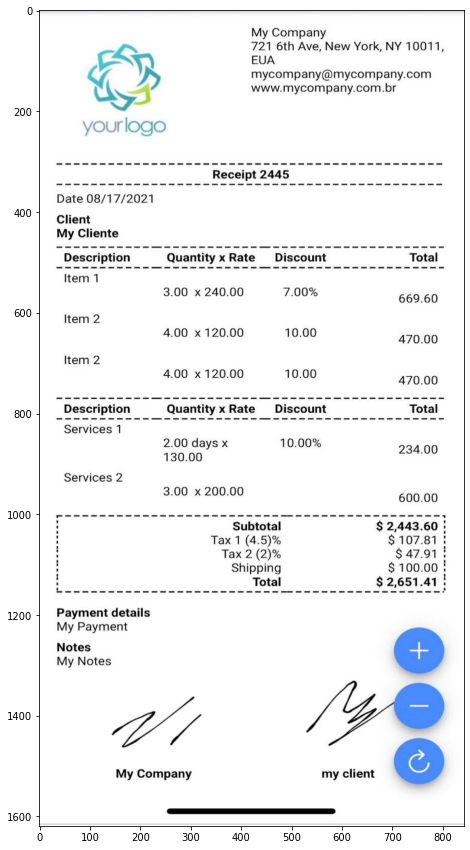

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("eng.jpg")
image = image[..., ::-1] 

plt.figure(figsize=(15,15))
plt.imshow(image)

# 04 OCR Tesseract Functions


## 4.1 **image_to_string** Text Extraction การดึงข้อความ

In [13]:
import pytesseract
image = cv2.imread("eng.jpg")
results = pytesseract.image_to_string(image)
results

'My Company\n721 6th Ave, New York, NY 10011,\n\na en\nUs3 www.mycompany.com.br\n\nyourlogo\nReceipt 2445\nDate 08/17/2021\nClient\nMy Cliente\n“Description QuantityxRate Discount Total\nItem 1\n3.00 x 240.00 7.00% 669.60\nItem 2\n4.00 x 120.00 10.00 470.00\nItem 2\n4.00 x 120.00 10.00 470.00\nDescription Quantity x Rate — Discount a\nServices 1\n2.00 days x 10.00%\not 234.00\nServices 2\n3.00 x 200.00\n: Subtotal\ni Tax 1 (4.5)%\ni Tax 2 (2)%\n: Shipping\ni Total\n\n \n\nPayment details\nMy Payment\n\nNotes\nMy Notes.\n\ni\n\nMy Company my client\n\n \n\x0c'

In [14]:
lines = results.split('\n')
for text in lines:
    print(text)

My Company
721 6th Ave, New York, NY 10011,

a en
Us3 www.mycompany.com.br

yourlogo
Receipt 2445
Date 08/17/2021
Client
My Cliente
“Description QuantityxRate Discount Total
Item 1
3.00 x 240.00 7.00% 669.60
Item 2
4.00 x 120.00 10.00 470.00
Item 2
4.00 x 120.00 10.00 470.00
Description Quantity x Rate — Discount a
Services 1
2.00 days x 10.00%
ot 234.00
Services 2
3.00 x 200.00
: Subtotal
i Tax 1 (4.5)%
i Tax 2 (2)%
: Shipping
i Total

 

Payment details
My Payment

Notes
My Notes.

i

My Company my client

 



## 4.2 **image_to_boxes** Text Location การหาตำเเหน่งข้อความ

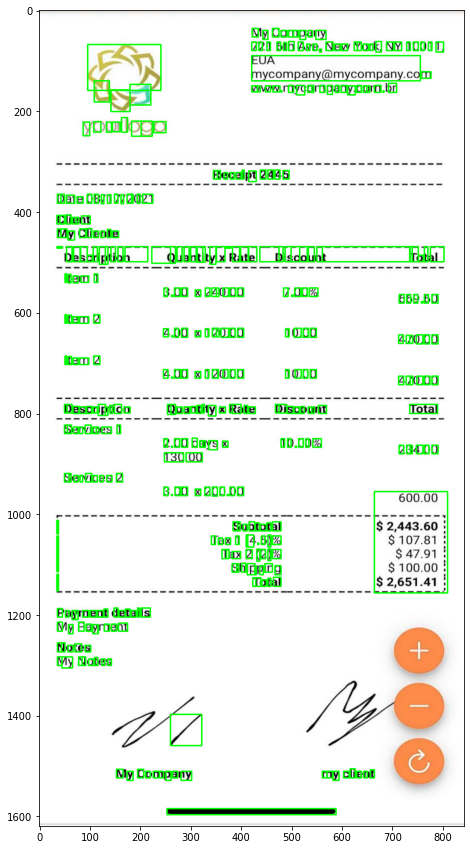

In [15]:
import pytesseract

image = cv2.imread("eng.jpg")
h, w, c = image.shape
boxes = pytesseract.image_to_boxes(image) 
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
plt.figure(figsize=(15,15))
plt.imshow(image)


## 4.3 **image_to_data** การดึงข้อมูลประกอบ 

'level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'

In [16]:
from pytesseract import Output

image = cv2.imread("eng.jpg")
d = pytesseract.image_to_data(image, output_type=Output.DICT)
for i in range(len(d['text'])):
    if float(d['conf'][i]) < 0.6 and len(d['text'][i]) == 0:
        continue
    left, top, width, height = d['left'][i], d['top'][i], d['width'][i], d['height'][i]
    print((d['text'][i]))
    

My
Company
721
6th
Ave,
New
York,
NY
10011,
a
en
Us3
www.mycompany.com.br
yourlogo
Receipt
2445
Date
08/17/2021
Client
My
Cliente
“Description
QuantityxRate
Discount
Total
Item
1
3.00
x
240.00
7.00%
669.60
Item
2
4.00
x
120.00
10.00
470.00
Item
2
4.00
x
120.00
10.00
470.00
Description
Quantity
x
Rate
—
Discount
a
Services
1
2.00
days
x
10.00%
ot
234.00
Services
2
3.00
x
200.00
:
Subtotal
i
Tax
1
(4.5)%
i
Tax
2
(2)%
:
Shipping
i
Total
 
Payment
details
My
Payment
Notes
My
Notes.
i
My
Company
my
client



In [ ]:
d.keys()

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])

## 4.4 เเสดงผลข้อความที่ Confident สูง

2 My 422 36 32 22


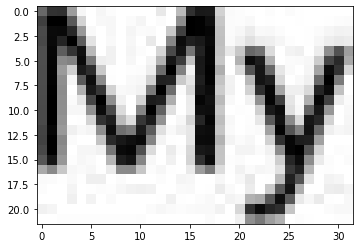

7 Company 462 36 106 22


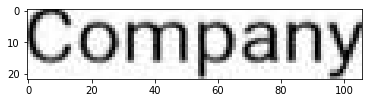

3 721 421 63 37 17


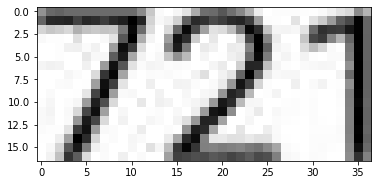

3 6th 471 62 34 18


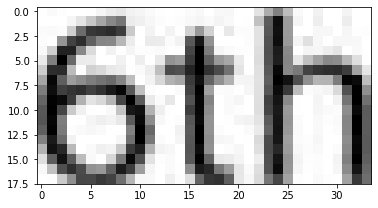

4 Ave, 513 63 46 20


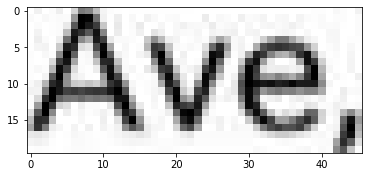

3 New 568 63 48 17


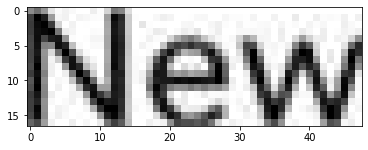

5 York, 624 62 54 21


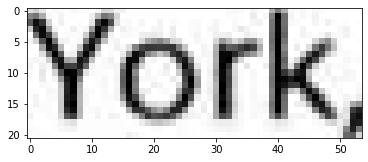

2 NY 688 63 30 17


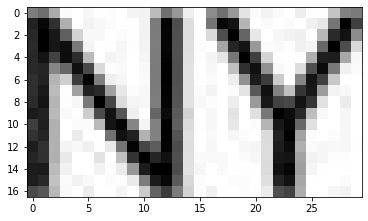

6 10011, 728 63 73 20


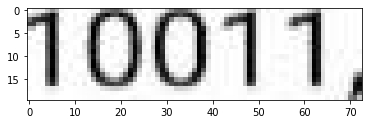

1 a 96 68 145 91


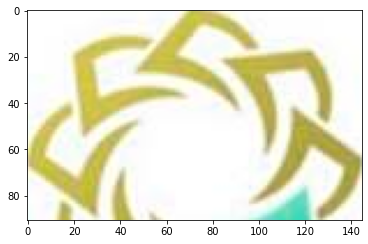

2 en 421 90 355 50


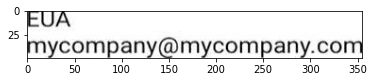

3 Us3 109 140 112 61


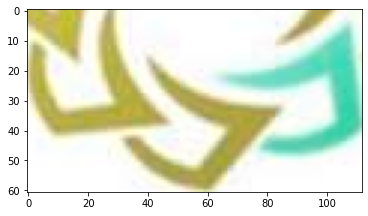

20 www.mycompany.com.br 421 145 287 23


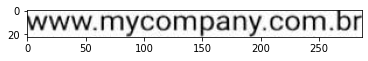

8 yourlogo 87 213 164 37


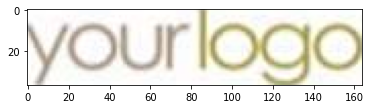

7 Receipt 345 317 85 23


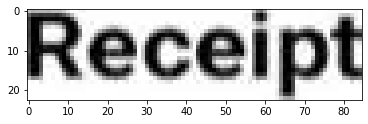

4 2445 438 317 57 18


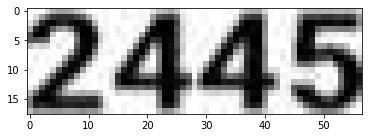

4 Date 36 365 51 18


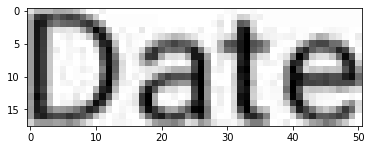

10 08/17/2021 95 365 130 19


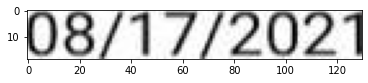

6 Client 35 406 66 18


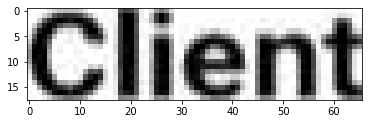

2 My 36 434 19 17


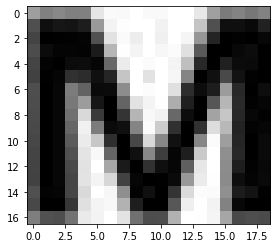

7 Cliente 57 433 100 23


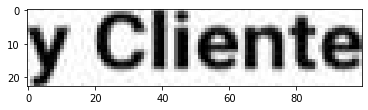

12 “Description 35 469 183 35


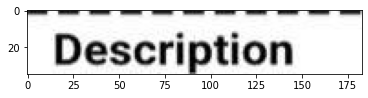

13 QuantityxRate 223 469 208 35


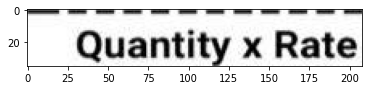

8 Discount 437 469 298 30


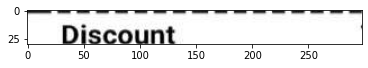

5 Total 734 469 68 30


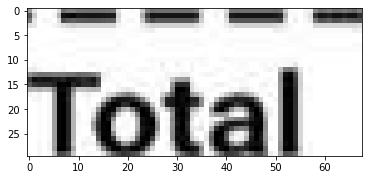

4 Item 51 523 48 18


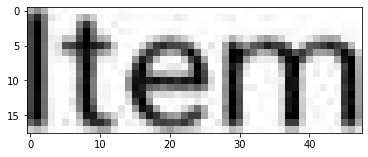

1 1 109 523 7 17


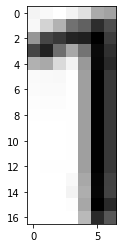

4 3.00 247 551 47 17


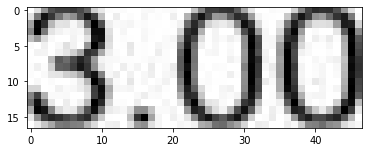

1 x 309 555 11 13


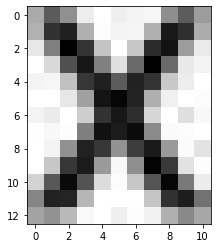

6 240.00 329 551 76 17


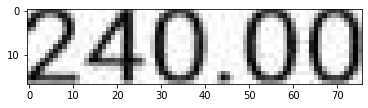

5 7.00% 484 551 68 17


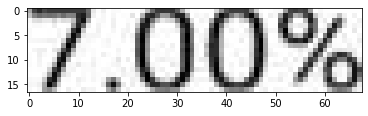

6 669.60 713 564 77 17


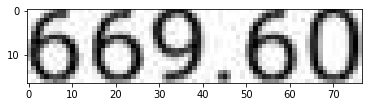

4 Item 51 604 48 17


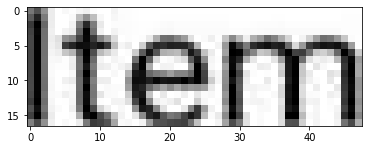

1 2 108 604 12 17


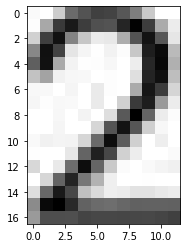

4 4.00 246 631 48 18


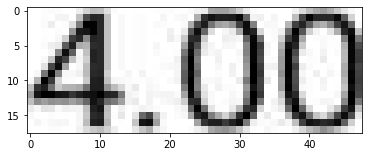

1 x 309 636 11 12


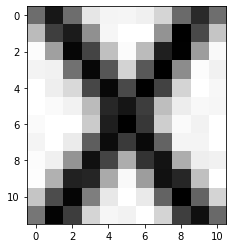

6 120.00 329 631 76 18


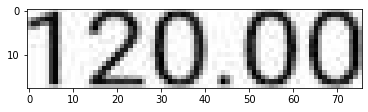

5 10.00 488 631 61 18


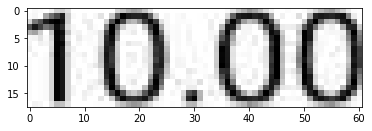

6 470.00 712 644 78 18


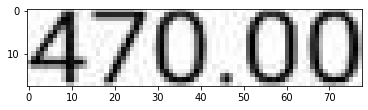

4 Item 51 686 48 17


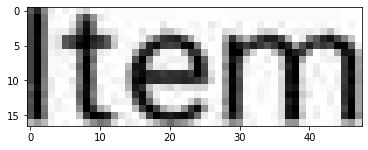

1 2 108 686 12 17


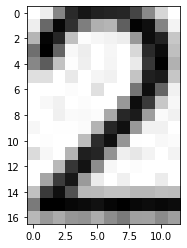

4 4.00 246 713 48 17


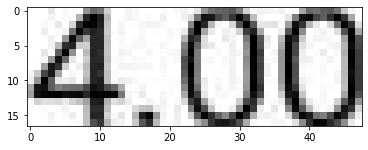

1 x 309 717 11 13


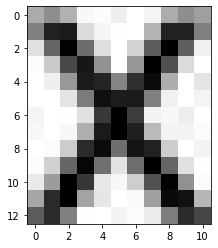

6 120.00 329 713 76 17


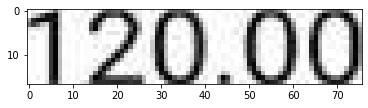

5 10.00 488 713 61 17


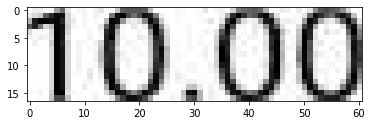

6 470.00 712 726 78 17


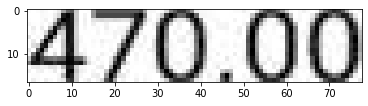

11 Description 50 782 130 22


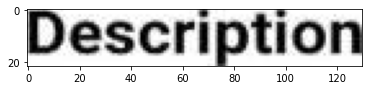

8 Quantity 254 782 96 23


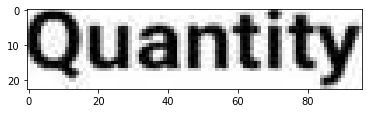

1 x 357 787 12 12


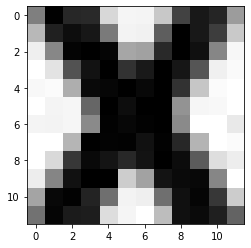

4 Rate 377 782 51 18


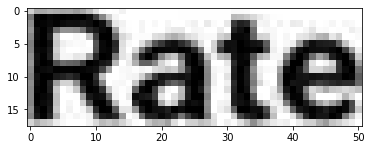

1 — 0 0 842 1619


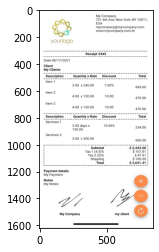

8 Discount 468 782 101 18


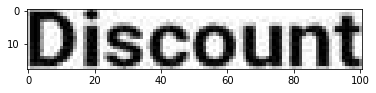

1 a 734 782 55 18


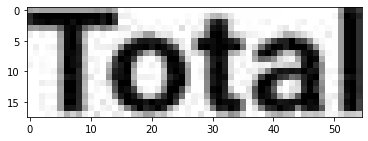

8 Services 50 823 94 17


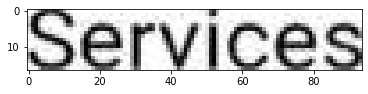

1 1 154 823 7 17


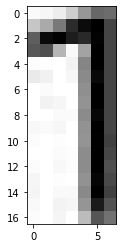

4 2.00 247 850 47 17


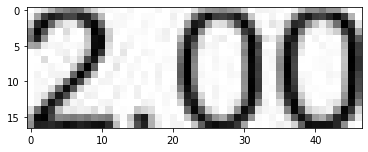

4 days 303 849 51 23


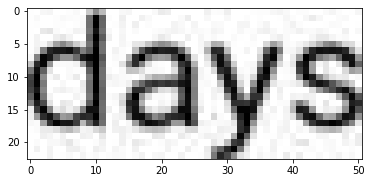

1 x 363 855 11 12


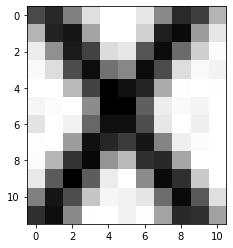

6 10.00% 479 850 80 17


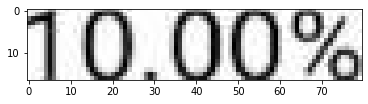

2 ot 248 878 75 18


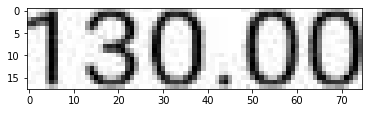

6 234.00 713 863 77 17


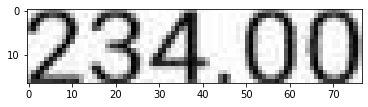

8 Services 50 919 94 17


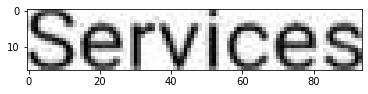

1 2 153 919 12 17


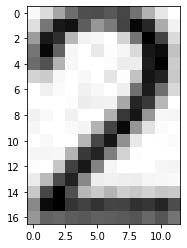

4 3.00 247 946 47 17


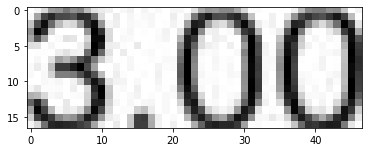

1 x 309 950 11 13


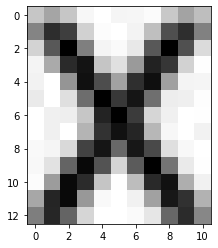

6 200.00 328 946 77 18


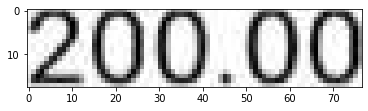

1 : 35 1012 3 27


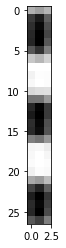

8 Subtotal 384 1015 95 18


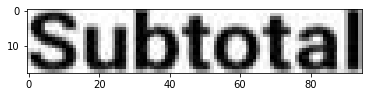

1 i 35 1043 3 26


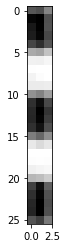

3 Tax 341 1043 39 17


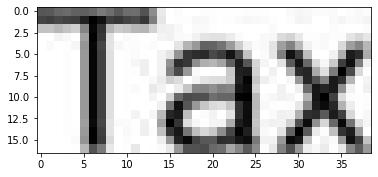

1 1 389 1043 7 17


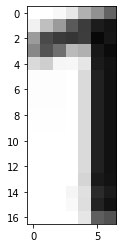

6 (4.5)% 410 1041 69 24


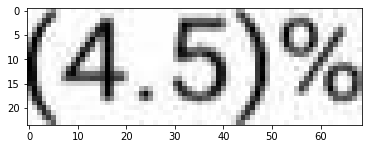

1 i 35 1070 3 27


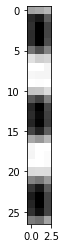

3 Tax 362 1070 39 18


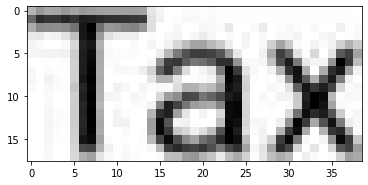

1 2 410 1070 12 18


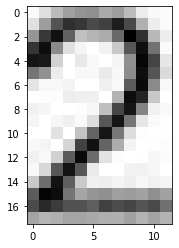

4 (2)% 431 1069 48 24


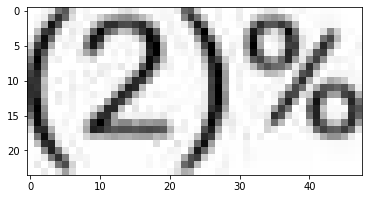

1 : 35 1098 3 16


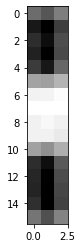

8 Shipping 382 1097 97 23


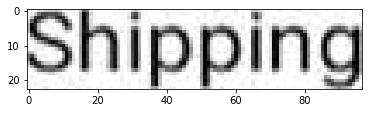

1 i 35 1119 3 33


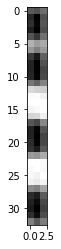

5 Total 423 1125 56 18


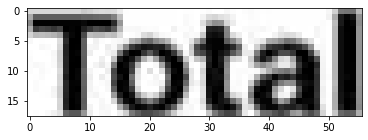

1   664 955 145 201


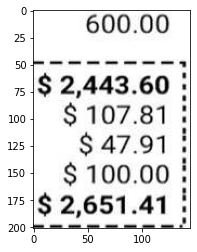

7 Payment 36 1187 91 22


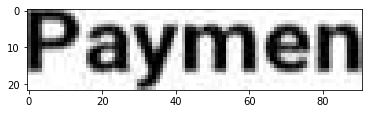

7 details 128 1186 92 18


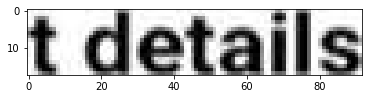

2 My 36 1214 33 23


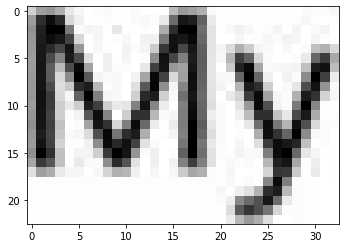

7 Payment 78 1214 97 23


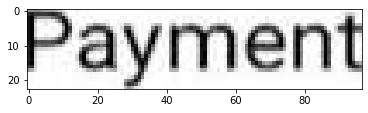

5 Notes 36 1255 66 18


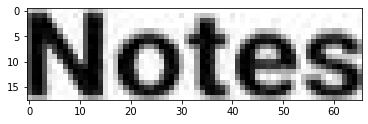

2 My 36 1283 33 22


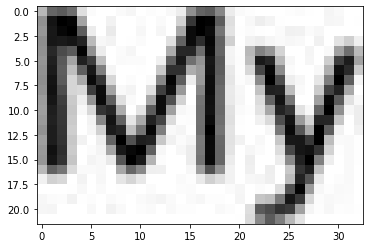

6 Notes. 78 1283 65 17


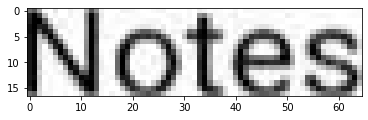

1 i 260 1397 62 62


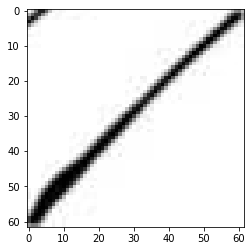

2 My 153 1506 34 22


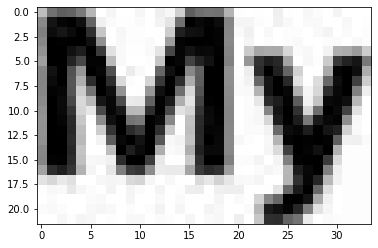

7 Company 195 1506 107 22


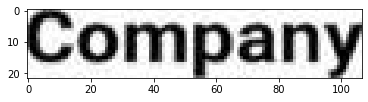

2 my 561 1510 20 13


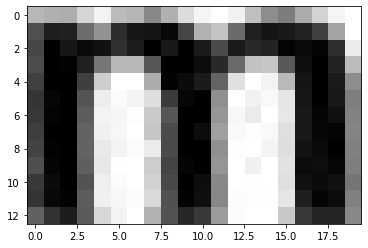

6 client 582 1505 82 23


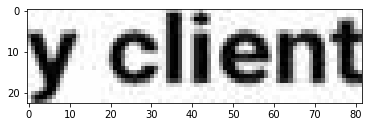

0  253 1584 335 12


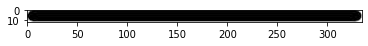

In [17]:
for i in range(len(d['text'])):
    if float(d['conf'][i]) < 0.6 and len(d['text'][i]) == 0:
        continue
    left, top, width, height = d['left'][i], d['top'][i], d['width'][i], d['height'][i]
    print(len(d['text'][i]), d['text'][i], left, top, width, height)
    plt.imshow(image[top:top+height, left:left+width, :])
    plt.show()


In [ ]:
dir(pytesseract)

['ALTONotSupported',
 'Output',
 'TSVNotSupported',
 'TesseractError',
 'TesseractNotFoundError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'get_languages',
 'get_tesseract_version',
 'image_to_alto_xml',
 'image_to_boxes',
 'image_to_data',
 'image_to_osd',
 'image_to_pdf_or_hocr',
 'image_to_string',
 'pytesseract',
 'run_and_get_output']